In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.feature_selection import f_regression
from xgboost import XGBRegressor
from keras.models import Sequential
from keras.layers import Dense
import joblib
import seaborn as sns


In [ ]:
# Load the dataset
data_path = 'world_happiness_report_csv.csv'
import codecs

with codecs.open(data_path, 'r', encoding='ISO-8859-1') as f:
    df = pd.read_csv(f)



In [ ]:
df.head(10)

,Year,Rank,Country name,Ladder score,upperwhisker,lowerwhisker,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
4,2020,150,Afghanistan,2.523,2.596,2.449,0.370,0.000,0.126,0.000,0.122,0.010,1.895
5,2019,153,Afghanistan,2.567,2.628,2.506,0.301,0.356,0.266,0.000,0.135,0.001,1.507
6,2018,154,Afghanistan,3.203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2017,145,Afghanistan,3.632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016,141,Afghanistan,3.794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,154,Afghanistan,3.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Define the new column names
new_column_names = {
    "Ladder score": "Happiness_Score",
    "Explained by: Log GDP per capita": "GDP_per_capita",
    "Explained by: Social support": "Social_Support",
    "Explained by: Healthy life expectancy": "Healthy_Life_Expectancy",
    "Explained by: Freedom to make life choices": "Freedom_to_Choose",
    "Explained by: Generosity": "Generosity_Score",
    "Explained by: Perceptions of corruption": "Corruption_Perception"
}

# Rename the columns
df = df.rename(columns=new_column_names)


In [ ]:
df.columns

Index(['Year', 'Rank', 'Country name', 'Happiness_Score', 'upperwhisker',
       'lowerwhisker', 'GDP_per_capita', 'Social_Support',
       'Healthy_Life_Expectancy', 'Freedom_to_Choose', 'Generosity_Score',
       'Corruption_Perception', 'Dystopia + residual'],
      dtype='object')

In [ ]:
df.shape

(1969, 13)

Preprocessing the Data

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Year,0
Rank,0
Country name,0
Happiness_Score,0
upperwhisker,1094
lowerwhisker,1094
GDP_per_capita,1097
Social_Support,1097
Healthy_Life_Expectancy,1099
Freedom_to_Choose,1098


In [ ]:
# Group by country and calculate the average happiness score (if multiple rows exist for a country)
df_unique = df.groupby('Country name', as_index=False)['Happiness_Score'].mean()

# Sort the dataframe by Happiness_Score in descending order
df_sorted = df_unique.sort_values(by='Happiness_Score', ascending=False)
df_sorted.head(20)

,Country name,Happiness_Score
49,Finland,7.646923
40,Denmark,7.605462
112,Norway,7.462154
64,Iceland,7.460231
146,Switzerland,7.429538
105,Netherlands,7.415615
145,Sweden,7.356846
70,Israel,7.252692
106,New Zealand,7.233769
6,Australia,7.213077


<ipython-input-184-53ccffb19260>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Happiness_Score', y='Country name', data=df_unique_top_20, palette='viridis', width=0.5)


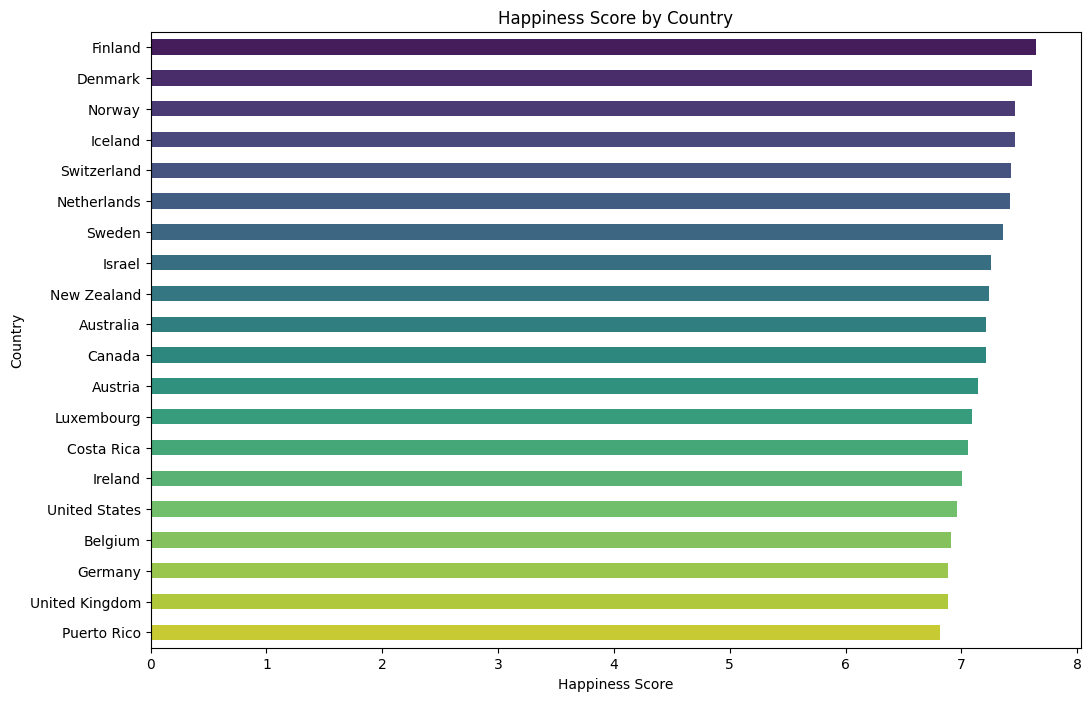

In [ ]:

df_unique_top_20 = df_sorted.head(20)

# Create the barplot again
plt.figure(figsize=(12, 8))
sns.barplot(x='Happiness_Score', y='Country name', data=df_unique_top_20, palette='viridis', width=0.5)

# Add labels and title
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Happiness Score by Country')

# Show the plot
plt.show()


In [ ]:
#Plot Happiness Score by GDP
df_not_null = df.dropna(subset=['GDP_per_capita'])

# Sort the dataframe by Happiness_Score in descending order
df_sorted = df_not_null.sort_values(by='Happiness_Score', ascending=False)

df_sorted.head(20)


,Year,Rank,Country name,Happiness_Score,upperwhisker,lowerwhisker,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Choose,Generosity_Score,Corruption_Perception,Dystopia + residual
567,2020,2,Finland,7.842,7.904,7.780,1.446,1.106,0.741,0.691,0.124,0.481,3.253
566,2021,1,Finland,7.821,7.886,7.756,1.892,1.258,0.775,0.736,0.109,0.534,2.518
568,2019,1,Finland,7.809,7.870,7.748,1.285,1.500,0.961,0.662,0.160,0.478,2.763
565,2022,1,Finland,7.804,7.875,7.733,1.888,1.585,0.535,0.772,0.126,0.535,2.363
564,2023,1,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
0,2024,1,Finland,7.736,7.810,7.662,1.749,1.783,0.824,0.986,0.110,0.502,1.782
460,2019,2,Denmark,7.646,7.711,7.580,1.327,1.503,0.979,0.665,0.243,0.495,2.433
458,2021,2,Denmark,7.636,7.710,7.563,1.953,1.243,0.777,0.719,0.188,0.532,2.226
459,2020,3,Denmark,7.620,7.687,7.552,1.502,1.108,0.763,0.686,0.208,0.485,2.868
457,2022,2,Denmark,7.586,7.667,7.506,1.949,1.548,0.537,0.734,0.208,0.525,2.084


In [ ]:
# Group by country and calculate the average happiness score (if multiple rows exist for a country)
df_unique = df_sorted.groupby('Country name', as_index=False)[['Happiness_Score','GDP_per_capita']].mean()

# Sort the dataframe by Happiness_Score in descending order
df_sorted = df_unique.sort_values(by='Happiness_Score', ascending=False)
df_sorted.head(20)

,Year,Rank,Country name,Happiness_Score,upperwhisker,lowerwhisker,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Choose,Generosity_Score,Corruption_Perception,Dystopia + residual
567,2020,2,Finland,7.842,7.904,7.780,1.446,1.106,0.741,0.691,0.124,0.481,3.253
566,2021,1,Finland,7.821,7.886,7.756,1.892,1.258,0.775,0.736,0.109,0.534,2.518
568,2019,1,Finland,7.809,7.870,7.748,1.285,1.500,0.961,0.662,0.160,0.478,2.763
565,2022,1,Finland,7.804,7.875,7.733,1.888,1.585,0.535,0.772,0.126,0.535,2.363
564,2023,1,Finland,7.741,7.815,7.667,1.844,1.572,0.695,0.859,0.142,0.546,2.082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,2021,146,Afghanistan,2.404,2.469,2.339,0.758,0.000,0.289,0.000,0.089,0.005,1.263
969,2022,136,Lebanon,2.392,2.479,2.305,1.417,0.476,0.398,0.123,0.061,0.027,-0.110
2,2022,137,Afghanistan,1.859,1.923,1.795,0.645,0.000,0.087,0.000,0.093,0.059,0.976
1,2023,143,Afghanistan,1.721,1.775,1.667,0.628,0.000,0.242,0.000,0.091,0.088,0.672


In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Happiness_Score', y='GDP_per_capita', data=df_sorted, palette='viridis', width=0.5)

# Add labels and title
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.title('Happiness Score by Country')

# Show the plot
plt.show()


In [ ]:
# Drop the 'Country' and "Rank" column as we don't need it for modeling
df = df.drop(columns=["Country name"])

In [ ]:
# Fill NaN values with the mean of each column (numerical columns)
df = df.fillna(df.mean(numeric_only=True))

In [ ]:
df.corr()['Happiness_Score'].sort_values(ascending=False)

,Happiness_Score
Happiness_Score,1.000000
lowerwhisker,0.665514
upperwhisker,0.665492
GDP_per_capita,0.458434
Social_Support,0.456223
Healthy_Life_Expectancy,0.437363
Freedom_to_Choose,0.360348
Corruption_Perception,0.287307
Dystopia + residual,0.275491
Year,0.057769


In [ ]:
# Define the target and features
X = df.drop("Happiness_Score", axis=1)
y = df["Happiness_Score"]

In [ ]:
X

,Year,Rank,upperwhisker,lowerwhisker,GDP_per_capita,Social_Support,Healthy_Life_Expectancy,Freedom_to_Choose,Generosity_Score,Corruption_Perception,Dystopia + residual
0,2024,1,7.810000,7.662000,1.74900,1.783000,0.824000,0.986000,0.110000,0.502000,1.782000
1,2023,143,1.775000,1.667000,0.62800,0.000000,0.242000,0.000000,0.091000,0.088000,0.672000
2,2022,137,1.923000,1.795000,0.64500,0.000000,0.087000,0.000000,0.093000,0.059000,0.976000
3,2021,146,2.469000,2.339000,0.75800,0.000000,0.289000,0.000000,0.089000,0.005000,1.263000
4,2020,150,2.596000,2.449000,0.37000,0.000000,0.126000,0.000000,0.122000,0.010000,1.895000
...,...,...,...,...,...,...,...,...,...,...,...
1964,2016,138,5.648687,5.418737,1.22028,1.078529,0.542917,0.563723,0.154259,0.144356,1.832778
1965,2015,131,5.648687,5.418737,1.22028,1.078529,0.542917,0.563723,0.154259,0.144356,1.832778
1966,2014,115,5.648687,5.418737,1.22028,1.078529,0.542917,0.563723,0.154259,0.144356,1.832778
1967,2012,103,5.648687,5.418737,1.22028,1.078529,0.542917,0.563723,0.154259,0.144356,1.832778


In [ ]:
# Display basic information
print(df.info(verbose=False))
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Columns: 12 entries, Year to Dystopia + residual
dtypes: float64(10), int64(2)
memory usage: 184.7 KB
None
              Year         Rank  Happiness_Score  upperwhisker  lowerwhisker  \
count  1969.000000  1969.000000      1969.000000   1969.000000   1969.000000   
mean   2017.714068    76.430168         5.451904      5.648687      5.418737   
std       3.964913    43.942744         1.121865      0.735676      0.759088   
min    2011.000000     1.000000         1.364000      1.427000      1.301000   
25%    2015.000000    38.000000         4.596000      5.648687      5.418737   
50%    2018.000000    76.000000         5.456000      5.648687      5.418737   
75%    2021.000000   114.000000         6.295000      5.648687      5.418737   
max    2024.000000   158.000000         7.856000      7.904000      7.780000   

       GDP_per_capita  Social_Support  Healthy_Life_Expectancy  \
count     1969.000000     1969.0

Data Preprocessing

In [ ]:
#Feature Importance from a Model

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False)


,0
Rank,0.976595
upperwhisker,0.011122
lowerwhisker,0.007056
Year,0.003451
Freedom_to_Choose,0.000548
Social_Support,0.000317
Corruption_Perception,0.000249
Dystopia + residual,0.000218
GDP_per_capita,0.000210
Healthy_Life_Expectancy,0.000134


In [ ]:
# f_regression
f_scores, p_values = f_regression(X, y)
feature_scores = pd.DataFrame({'Feature': X.columns, 'F-Score': f_scores, 'P-Value': p_values})
print(feature_scores.sort_values(by='F-Score', ascending=False))

                    Feature       F-Score        P-Value
1                      Rank  60370.174596   0.000000e+00
3              lowerwhisker   1563.842308  3.546556e-252
2              upperwhisker   1563.654749  3.736896e-252
4            GDP_per_capita    523.384630  6.628832e-103
5            Social_Support    517.024443  8.236918e-102
6   Healthy_Life_Expectancy    465.257056   8.501307e-93
7         Freedom_to_Choose    293.531819   1.937463e-61
9     Corruption_Perception    176.975552   9.910702e-39
10      Dystopia + residual    161.547144   1.255792e-35
0                      Year      6.586430   1.034933e-02
8          Generosity_Score      1.699357   1.925246e-01


In [ ]:
# Data scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
# Check the shapes of the splits
X_train.shape, X_test.shape

((1575, 11), (394, 11))

In [ ]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.11747702146259696
Mean Squared Error: 0.02811347144174125
R-squared: 0.9707277802260325


In [ ]:
# Random Forest with hyperparameter tuning
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# XGBoost with hyperparameter tuning
xgb = XGBRegressor(random_state=42)
xgb_params = {'n_estimators': [100, 200], 'learning_rate': [0.05, 0.1], 'max_depth': [3, 6]}
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='r2')
xgb_grid.fit(X_train, y_train)
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)


In [ ]:
# Deep Learning Model
dnn = Sequential()
dnn.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
dnn.add(Dense(32, activation='relu'))
dnn.add(Dense(1))
dnn.compile(optimizer='adam', loss='mean_squared_error')
dnn.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)
y_pred_dnn = dnn.predict(X_test).flatten()



In [ ]:
from sklearn.svm import SVR
# Create and train the SVR model
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
r2 = r2_score(y_test, y_pred_svr)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.07010709275575486
Mean Squared Error: 0.01633034791775674
R-squared: 0.9829965668158581


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# Evaluation function
def evaluate_model(name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{name} - RMSE: {rmse:.3f}, R^2: {r2:.3f}")

# Evaluate all models
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)
evaluate_model("Deep Learning", y_test, y_pred_dnn)

Linear Regression - RMSE: 0.168, R^2: 0.971
Random Forest - RMSE: 0.048, R^2: 0.998
XGBoost - RMSE: 0.038, R^2: 0.999
Deep Learning - RMSE: 0.041, R^2: 0.998


In [3]:
# Import necessary libraries for metrics
from sklearn.metrics import mean_squared_error, r2_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'XGBoost': XGBRegressor(),
    'Neural Network': Sequential([
        Dense(64, input_dim=X_train.shape[1], activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])
}

# Train models and make predictions
mse_scores = {}
r2_scores = {}

for name, model in models.items():
    if name == 'Neural Network':
        # Compile and fit neural network model
        model.compile(optimizer='adam', loss='mean_squared_error')
        model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)
        # Make predictions
        y_pred = model.predict(X_test)
    else:
        # Train other models
        model.fit(X_train, y_train)
        # Make predictions
        y_pred = model.predict(X_test)

    # Calculate MSE and R²
    mse_scores[name] = mean_squared_error(y_test, y_pred)
    r2_scores[name] = r2_score(y_test, y_pred)

# Create a DataFrame for the results
performance_df = pd.DataFrame({
    'Model': list(mse_scores.keys()),
    'MSE': list(mse_scores.values()),
    'R²': list(r2_scores.values())
})

# Plot MSE and R² for comparison
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE Plot
sns.barplot(x='MSE', y='Model', data=performance_df, ax=ax[0], palette='viridis')
ax[0].set_title('Mean Squared Error (MSE) Comparison')

# R² Plot
sns.barplot(x='R²', y='Model', data=performance_df, ax=ax[1], palette='viridis')
ax[1].set_title('R-squared (R²) Comparison')

# Display the plots
plt.tight_layout()
plt.show()


NameError: name 'X' is not defined